# **VGG-16 FOR X-RAY IMAGES**

In [ ]:
from google.colab import drive #mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/full  #unzipping dataset

Streaming output truncated to the last 5000 lines.
  inflating: full/train/normal/Normal-10010.png  
  inflating: __MACOSX/full/train/normal/._Normal-10010.png  
  inflating: full/train/normal/Normal-2408.png  
  inflating: __MACOSX/full/train/normal/._Normal-2408.png  
  inflating: full/train/normal/Normal-716.png  
  inflating: __MACOSX/full/train/normal/._Normal-716.png  
  inflating: full/train/normal/Normal-7564.png  
  inflating: __MACOSX/full/train/normal/._Normal-7564.png  
  inflating: full/train/normal/Normal-10004.png  
  inflating: __MACOSX/full/train/normal/._Normal-10004.png  
  inflating: full/train/normal/Normal-1883.png  
  inflating: __MACOSX/full/train/normal/._Normal-1883.png  
  inflating: full/train/normal/Normal-9575.png  
  inflating: __MACOSX/full/train/normal/._Normal-9575.png  
  inflating: full/train/normal/Normal-1897.png  
  inflating: __MACOSX/full/train/normal/._Normal-1897.png  
  inflating: full/train/normal/Normal-4737.png  
  inflating: __MACOSX/full

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16 #importing vgg16 model

In [ ]:
base_model = VGG16(input_shape = (224, 224, 3), 
include_top = False, 
weights = 'imagenet') #pre-trained on imagenet

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#defining model architecture
x = keras.layers.Flatten()(base_model.output)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(base_model.input, x)

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
#compiling model
model.compile(optimizer = Adam(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#importing libraries
import cv2
import pandas as pd
import os
import numpy as np
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
images=[]
labels=[]

In [ ]:
a="/content/full/train/covid/" #path for covid positive training images

In [ ]:
#preparing training data
for item in os.listdir(a):
    c=str(a+item)
    img = cv2.imread(c) 
    width = 224
    height = 224
    dim = (width, height)
    try:
        resized = cv2.resize(img, dim , interpolation=cv2.INTER_AREA) #resizing
    except:
        break
        print("b")
    images.append(resized)
    labels.append("1") #1 for covid positive
    
for item in os.listdir("/content/full/train/normal"): #path for covid negative training images
    img = cv2.imread("/content/full/train/normal/"+item) 
    width=224
    height=224
    dim=(width,height)
    try:
        res = cv2.resize(img, dim , interpolation=cv2.INTER_AREA)
       
    except:
        print("b")
        break

    images.append(res)
    labels.append("0") #0 for covid negative

In [ ]:
len(images)

3000

In [ ]:
len(labels)

3000

In [ ]:
images=np.asarray(images)

In [ ]:
labels=np.asarray(labels)

In [ ]:
trainy=labels.astype("uint8")

In [ ]:
#creating dataframe of images and their corresponding labels to shuffle later
df = pd.DataFrame(list(zip(images, labels)), 
               columns =['Image', 'Label'])

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df) #shuffling df

In [ ]:
trainx=df["Image"]

In [ ]:
trainy=df["Label"]

In [ ]:
trainx=np.asarray(trainx)

In [ ]:
traindata=[] 
for i in range (len(trainx)):
    trx=trainx[i]
    traindata.append(trx)

In [ ]:
traindata=np.asarray(traindata) #converting back to array

In [ ]:
trainy=np.asarray(trainy)

In [ ]:
trainy=trainy.astype("uint8")

In [ ]:
vgg_history=model.fit(traindata, trainy, epochs=40, validation_split=0.1) #training the model

Epoch 1/40
85/85 [==============================] - 63s 302ms/step - loss: 1.4532 - acc: 0.8596 - val_loss: 0.2039 - val_acc: 0.9600
Epoch 2/40
85/85 [==============================] - 21s 251ms/step - loss: 0.2352 - acc: 0.9578 - val_loss: 0.1603 - val_acc: 0.9667
Epoch 3/40
85/85 [==============================] - 21s 252ms/step - loss: 0.1035 - acc: 0.9715 - val_loss: 0.2207 - val_acc: 0.9433
Epoch 4/40
85/85 [==============================] - 21s 251ms/step - loss: 0.0468 - acc: 0.9889 - val_loss: 0.4363 - val_acc: 0.9167
Epoch 5/40
85/85 [==============================] - 22s 254ms/step - loss: 0.0832 - acc: 0.9822 - val_loss: 0.1621 - val_acc: 0.9700
Epoch 6/40
85/85 [==============================] - 21s 253ms/step - loss: 0.0505 - acc: 0.9863 - val_loss: 0.1957 - val_acc: 0.9633
Epoch 7/40
85/85 [==============================] - 21s 253ms/step - loss: 0.0308 - acc: 0.9904 - val_loss: 0.1883 - val_acc: 0.9700
Epoch 8/40
85/85 [==============================] - 21s 253ms/step - 

In [ ]:
#now repeating the same steps as above for test set..

In [ ]:
a="/content/full/test/covid/"      #path for covid positive test images

In [ ]:
images=[]
labels=[]

In [ ]:
#preparing test set
for item in os.listdir(a):
    c=str(a+item)
    img = cv2.imread(c) 
    

    width = 224
    height = 224
    dim = (width, height)
    try:
        resized = cv2.resize(img, dim , interpolation=cv2.INTER_AREA) #resizing
        #print("t")
    except:
        break
        print("b")

    images.append(resized)
    labels.append("1")
    
for item in os.listdir("/content/full/test/normal"): #path for covid neg test images
    img = cv2.imread("/content/full/test/normal/"+item) 
    width=224
    height=224
    dim=(width,height)
    try:
        res = cv2.resize(img, dim , interpolation=cv2.INTER_AREA)
       
    except:
        print("b")
        break
    images.append(res)
    labels.append("0")

In [ ]:
images=np.asarray(images)

In [ ]:
labels=np.asarray(labels)

In [ ]:
testy=labels.astype("uint8")

In [ ]:
#creating dataframe of images and labels to shuffle the test set in next steps.
dframe = pd.DataFrame(list(zip(images, labels)), 
               columns =['Image', 'Label'])

In [ ]:
from sklearn.utils import shuffle
dframe = shuffle(dframe)

In [ ]:
testx=dframe["Image"]

In [ ]:
testy=dframe["Label"]

In [ ]:
testx=np.asarray(testx)

In [ ]:
testdata=[]
for i in range(len(testx)):
  tsx=testx[i]
  testdata.append(tsx)

In [ ]:
testdata=np.asarray(testdata) #converting back to array

In [ ]:
testy=np.asarray(testy)

In [ ]:
testy=testy.astype("uint8")

In [ ]:
testdata.shape

(1000, 224, 224, 3)

In [ ]:
testy.shape

(1000,)

In [ ]:
score = model.evaluate(testdata, testy, verbose = 0)  #evaluating the model

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.7251448631286621
Test accuracy: 0.9580000042915344


In [ ]:
predictions = model.predict(testdata) #generating predictions

In [ ]:
preds=[] 
for i in range(len(predictions)):
  if(predictions[i]>=0.5):
    preds.append(int("1"))
  else:
    preds.append(int("0"))

In [ ]:
preds=np.array(preds)

In [ ]:
 # counting miscalssifications
ctr=0
for i in range(len(preds)):
  if(preds[i]!=testy[i]):
    ctr=ctr+1
print(ctr)

42


In [ ]:
#performance metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

In [ ]:
precision = precision_score(testy, preds) #precision

In [ ]:
print(precision)

0.9810924369747899


In [ ]:
matrix = confusion_matrix(testy, preds) #confusion matrix

In [ ]:
print(matrix)

[[491   9]
 [ 33 467]]


In [ ]:
recall = recall_score(testy, preds) #recall

In [ ]:
print(recall)

0.934


In [ ]:
f1=f1_score(testy, preds) #f1-score

In [ ]:
print(f1)

0.9569672131147541


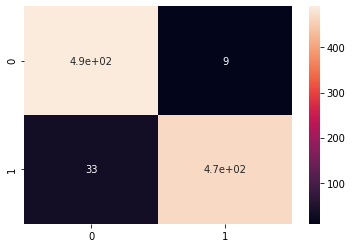

In [ ]:
import seaborn as sns #plotting the matrix
sns.heatmap(matrix, annot=True)

In [ ]:
kappa = cohen_kappa_score(testy, preds) #cohen kappa score
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.916000
